#   Question 2 
_Mohamed Amine Arfaoui_

##  Packages Importation and Initialization

###  Importation of tensorflow, numpy and keras

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten
from tensorflow.python.keras.optimizers import sgd


In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


### Sizes of training and test sets

In [3]:
print("Size of:")
print("- Training-set:\t\t{}".format(x_train.shape[0]))
print("- Test-set:\t\t{}".format(x_test.shape[0]))
print(" Shape of train target set:{}".format(y_train.shape))

Size of:
- Training-set:		60000
- Test-set:		10000
 Shape of train target set:(60000,)


### One hot encoding on _y_train_

We perform a one hot encoding on y_train so that it has the shape (60000,10).

In [4]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories='auto')
enc.fit(y_train.reshape(-1, 1))
y_train_onehot = enc.transform(y_train.reshape(-1, 1)).toarray()
y_train_onehot.shape

(60000, 10)

### One hot encoding on _y_test_

We perform a one hot encoding on y_test so that it has the shape (60000,10).

In [5]:
enc = OneHotEncoder(categories='auto')
enc.fit(y_test.reshape(-1, 1))
y_test_onehot = enc.transform(y_test.reshape(-1, 1)).toarray()
y_test_onehot.shape

(10000, 10)

### Sequential Model


We create our sequential model by stacking layers:

In [6]:
# Start construction of the Keras Sequential model.
model = Sequential()

# Add an input layer 
model.add(InputLayer(input_shape=((28, 28))))

# Convolutional layers expect images with shape (28, 28, 1)
model.add(Reshape((28, 28, 1)))

# First convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=3, strides=2, filters=512, padding='same',
                 activation='tanh', name='layer_conv1'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Second convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=3, strides=2, filters=128, padding='same',
                 activation='relu', name='layer_conv2'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten the 4-rank output of the convolutional layers to 2-rank that can be input to a fully-connected / dense layer.
model.add(Flatten())

# Last fully-connected / dense layer with softmax-activation for use in classification.
model.add(Dense(10, activation='softmax'))

A summary of the sequential model is presented in the following.

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 14, 14, 512)       5120      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 512)         0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 4, 4, 128)         589952    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                5130      
Total para

We adopt the stochastic gradient descent (sgd) as optimizer.

In [8]:
optimizer = sgd(lr=0.01)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training

For the model training, we use 10 epochs. The accuracy and the loss after each epoch are shown below.

In [9]:
%%time
history = model.fit(x=x_train, y=y_train_onehot, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 279s 5ms/step - loss: 0.3330 - acc: 0.9060
Epoch 2/10
60000/60000 [==============================] - 280s 5ms/step - loss: 0.1319 - acc: 0.9631
Epoch 3/10
60000/60000 [==============================] - 278s 5ms/step - loss: 0.0998 - acc: 0.9724
Epoch 4/10
60000/60000 [==============================] - 285s 5ms/step - loss: 0.0825 - acc: 0.9771
Epoch 5/10
60000/60000 [==============================] - 314s 5ms/step - loss: 0.0732 - acc: 0.9798
Epoch 6/10
60000/60000 [==============================] - 282s 5ms/step - loss: 0.0643 - acc: 0.9823
Epoch 7/10
60000/60000 [==============================] - 335s 6ms/step - loss: 0.0585 - acc: 0.9839
Epoch 8/10
60000/60000 [==============================] - 325s 5ms/step - loss: 0.0527 - acc: 0.9855
Epoch 9/10
60000/60000 [==============================] - 344s 6ms/step - loss: 0.0489 - acc: 0.9865
Epoch 10/10
60000/60000 [==============================] - 323s 5ms/step - loss: 0.0456 - a

The accuracy and the loss plots of the training are presented below.

### Accuracy plot

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

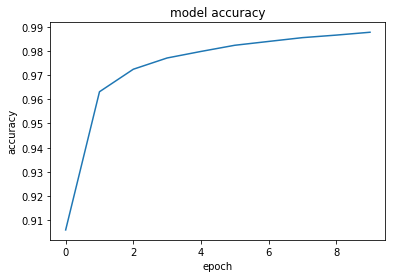

In [11]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

### Loss plot

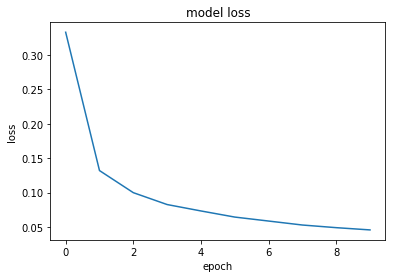

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

## Evaluation


Now the sequential model is evaluated using the test set. The accuracy and the loss are shown below.

In [13]:
result = model.evaluate(x_test, y_test_onehot)

10000/10000 [==============================] - 9s 929us/step


Performance metrics for the test-set.

In [14]:
for name, value in zip(model.metrics_names, result):
    print(name, value)

loss 0.05884964045826346
acc 0.982
